In [23]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import plot, show, savefig, xlim, figure,  ylim, legend, boxplot, setp, axes

from sklearn.cluster import Birch
from sklearn import metrics
from sklearn.metrics import pairwise_distances

from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [24]:
df = pd.read_csv('data.csv')
df.shape

(267, 7)

# Dataset was not complete so a number of samples needed to be droped to get equal splits of data

In [25]:
to_drop = [252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264,265,266]

In [26]:
traindf = df[['median_overhead', 'q1_overhead', 'q3_overhead', 'p9_overhead']].copy()
traindf.drop(to_drop, inplace=True)
traindf = traindf.to_numpy()
traindf_list = np.split(traindf, 18)

traindf_before =  df[['median_overhead', 'q1_overhead', 'q3_overhead', 'p9_overhead']].copy()
traindf_before =traindf_before.iloc[:144, :]
traindf_before = traindf_before.to_numpy()
traindf_before_list = np.split(traindf_before, 24)


data_to_plot = df.iloc[::6, :]
# data_to_plot.head()
data_to_plot = data_to_plot.to_numpy()

data_to_plot_before = df.iloc[:144, :]
data_to_plot_before = data_to_plot_before.to_numpy()

In [27]:
def plot_silhouette_scores(model, test_data, n_clusters_min, n_clusters_max):
    """ Plot silhouette scores and return the best number of clusters"""

    if len(model.subcluster_labels_) > 2:

        silhouette_scores = []

        clusters_range = range(n_clusters_min, n_clusters_max+1)
        results_dict = []
        # print(clusters_range)
        for number in clusters_range:
            # make a copy of the model so as not to mess up the 'correct' model
            model_cpy = model
            model_cpy.set_params(n_clusters=number)

            model_cpy.partial_fit()
            labels = model_cpy.predict(test_data)
            # print(labels)
            try: 
                s = metrics.silhouette_score(test_data, labels, metric='euclidean')
                silhouette_scores.append(s)
                results_dict.append((number, s))
            except ValueError:
                pass

        silhouette_range = [i[0] for i in results_dict]  
        plt.plot(silhouette_range[:], silhouette_scores[:])
        plt.xlabel('Number Of Clusers')
        plt.ylabel('Silhouette Score')
#         plt.savefig(folder + 'silhouette_'+ save_graph_name +'.png')
        plt.show()
        plt.close() 
        max_score = max(silhouette_scores)
        for i in results_dict:
            if i[1] == max_score:
                print("The highest silhouette scores(" + str(max_score) + ") is for " + str(i[0]) + " clusers")
                return int(i[0])
    else:
        print('couldnt get the scores, plz help')
        print('returning number of clusters = ' + str(n_clusters_min))
        return n_clusters_min

In [52]:
data_split_modified_z = df[['median_overhead', 'q1_overhead', 'q3_overhead', 'p9_overhead', 'totalCarNumber', 'index']].copy()
data_split_modified_z = data_split_modified_z.iloc[:144, :]
data_split_modified_z = data_split_modified_z.to_numpy()

""" SIZE 12 """
data_split_modified_z_12 = np.split(data_split_modified_z, 12)
indexes = [] 

for d in range(len(data_split_modified_z_12)):
    ind = []
    k = len(data_split_modified_z_12[d])
    for i in [0, 1, 2, 3]:
        ys = data_split_modified_z_12[d][:,i] 
        median_y = np.median(ys)
        median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in ys])
#         print(median_absolute_deviation_y)
        for y in range(len(data_split_modified_z_12[d])):
            modified_z_score = 0.6745 * (data_split_modified_z_12[d][y, i] - median_y) / median_absolute_deviation_y
#             z_score = (data_split[d][y, i]  - mean_ys) / std_ys
            if np.abs(modified_z_score) > 3.5:
                ind.append(y)


    data_split_modified_z_12[d] = np.delete(data_split_modified_z_12[d], ind, axis=0)
#     print('Outliers detected: ' + str((k - len(data_split_modified_z_12[d]))))

data_split_modified_z_12 = np.concatenate(data_split_modified_z_12, axis=0)


In [53]:
data_split_modified_z_12_list = np.split(data_split_modified_z_12, 3)

# test of threshold of 'before accident' after outlier removal

couldnt get the scores, plz help
returning number of clusters = 2
couldnt get the scores, plz help
returning number of clusters = 2
couldnt get the scores, plz help
returning number of clusters = 2


/home/marta/env/lib/python3.6/site-packages/scikit_learn-0.22.2.post1-py3.6-linux-x86_64.egg/sklearn/cluster/_birch.py:638: ConvergenceWarning: Number of subclusters found (1) by Birch is less than (2). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/marta/env/lib/python3.6/site-packages/scikit_learn-0.22.2.post1-py3.6-linux-x86_64.egg/sklearn/cluster/_birch.py:638: ConvergenceWarning: Number of subclusters found (1) by Birch is less than (2). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/marta/env/lib/python3.6/site-packages/scikit_learn-0.22.2.post1-py3.6-linux-x86_64.egg/sklearn/cluster/_birch.py:638: ConvergenceWarning: Number of subclusters found (5) by Birch is less than (6). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


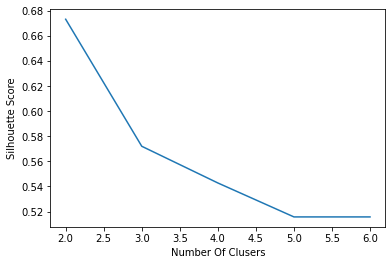

The highest silhouette scores(0.673177075365354) is for 2 clusers


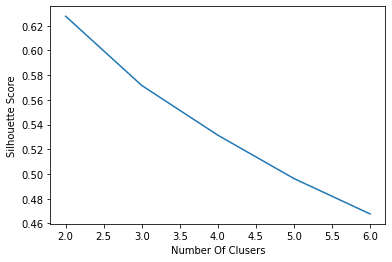

The highest silhouette scores(0.6276552900087009) is for 2 clusers
couldnt get the scores, plz help
returning number of clusters = 2


/home/marta/env/lib/python3.6/site-packages/scikit_learn-0.22.2.post1-py3.6-linux-x86_64.egg/sklearn/cluster/_birch.py:638: ConvergenceWarning: Number of subclusters found (1) by Birch is less than (2). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


In [70]:
model_02 = Birch(n_clusters=None, threshold=0.2)

for i in data_split_modified_z_12_list:
    model_02.partial_fit(i[:, :2])

# model.partial_fit(test_normal)

n = plot_silhouette_scores(model_02, data_split_modified_z_12[:, :2], 2, 6)

model_02.set_params(n_clusters = n)
model_02.partial_fit()
    
labels_02 = model_02.predict(data_split_modified_z_12[:, :2])
##########################################################
model_01= Birch(n_clusters=None, threshold=0.1)

for i in data_split_modified_z_12_list:
    model_01.partial_fit(i[:, :2])

# model.partial_fit(test_normal)

n = plot_silhouette_scores(model_01, data_split_modified_z_12[:, :2], 2, 6)

model_01.set_params(n_clusters = n)
model_01.partial_fit()
    
labels_01 = model_01.predict(data_split_modified_z_12[:, :2])
##########################################################
model_03 = Birch(n_clusters=None, threshold=0.3)

for i in data_split_modified_z_12_list:
    model_03.partial_fit(i[:, :2])

# model.partial_fit(test_normal)

n = plot_silhouette_scores(model_03, data_split_modified_z_12[:, :2], 2, 6)

model_03.set_params(n_clusters = n)
model_03.partial_fit()
    
labels_03 = model_03.predict(data_split_modified_z_12[:, :2])

##########################################################
model_005 = Birch(n_clusters=None, threshold=0.05)

for i in data_split_modified_z_12_list:
    model_005.partial_fit(i[:, :2])

# model.partial_fit(test_normal)

n = plot_silhouette_scores(model_005, data_split_modified_z_12[:, :2], 2, 6)

model_005.set_params(n_clusters = n)
model_005.partial_fit()
    
labels_005 = model_005.predict(data_split_modified_z_12[:, :2])

##############################################################
model_001 = Birch(n_clusters=None, threshold=0.01)

for i in data_split_modified_z_12_list:
    model_001.partial_fit(i[:, :2])

# model.partial_fit(test_normal)

n = plot_silhouette_scores(model_001, data_split_modified_z_12[:, :2], 2, 6)

model_001.set_params(n_clusters = n)
model_001.partial_fit()
    
labels_001 = model_001.predict(data_split_modified_z_12[:, :2])

##############################################################
model = Birch(n_clusters=None, threshold=0.5)

for i in data_split_modified_z_12_list:
    model.partial_fit(i[:, :2])

# model.partial_fit(test_normal)

n = plot_silhouette_scores(model, data_split_modified_z_12[:, :2], 2, 6)

model.set_params(n_clusters = n)
model.partial_fit()
    
labels = model.predict(data_split_modified_z_12[:, :2])

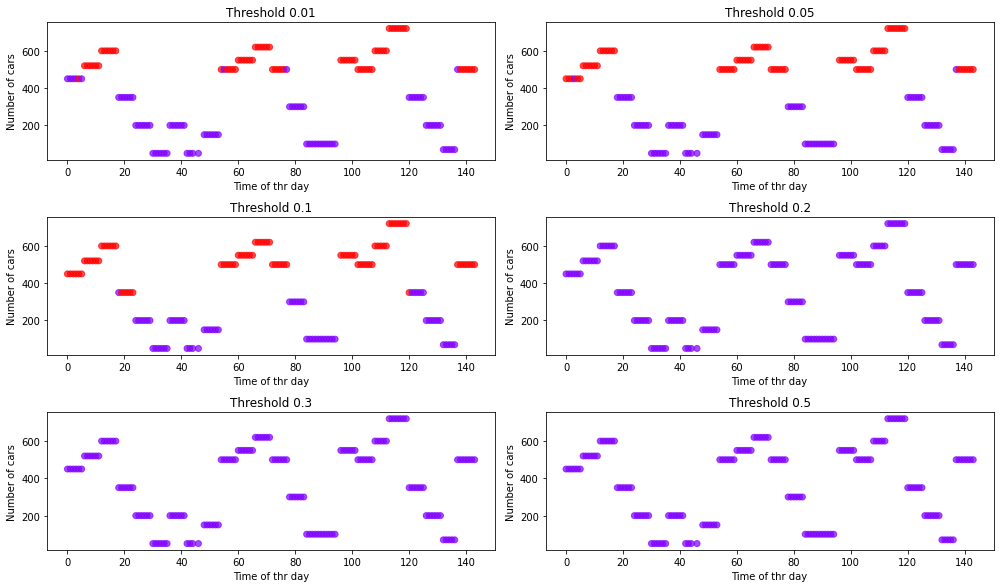

In [71]:
figure, axs = plt.subplots(nrows=3, ncols=2,figsize=(14,9))

axs[0,0].scatter(data_split_modified_z_12[:,5], data_split_modified_z_12[:,4], c=labels_001, cmap='rainbow', alpha=0.7)
# axs[0,0].axvline(x=143, color='r')
axs[0,0].set_ylabel('Number of cars')
axs[0,0].set_xlabel('Time of thr day')
axs[0,0].title.set_text("Threshold 0.01")

axs[0,1].scatter(data_split_modified_z_12[:,5], data_split_modified_z_12[:,4], c=labels_005, cmap='rainbow', alpha=0.7)
# axs[0,0].axvline(x=143, color='r')
axs[0,1].set_ylabel('Number of cars')
axs[0,1].set_xlabel('Time of thr day')
axs[0,1].title.set_text("Threshold 0.05")

axs[1,0].scatter(data_split_modified_z_12[:,5], data_split_modified_z_12[:,4], c=labels_01, cmap='rainbow', alpha=0.7)    
# axs[0,1].axvline(x=143, color='r')
axs[1,0].set_ylabel('Number of cars')
axs[1,0].set_xlabel('Time of thr day')
axs[1,0].title.set_text("Threshold 0.1")

axs[1,1].scatter(data_split_modified_z_12[:,5], data_split_modified_z_12[:,4], c=labels_02, cmap='rainbow', alpha=0.7)   
# axs[1,0].axvline(x=143, color='r')
axs[1,1].set_ylabel('Number of cars')
axs[1,1].set_xlabel('Time of thr day')
axs[1,1].title.set_text("Threshold 0.2")

axs[2,0].scatter(data_split_modified_z_12[:,5], data_split_modified_z_12[:,4], c=labels_03, cmap='rainbow', alpha=0.7)
# axs[1,1].axvline(x=143, color='r')
axs[2,0].set_ylabel('Number of cars')
axs[2,0].set_xlabel('Time of thr day')
axs[2,0].title.set_text("Threshold 0.3")

axs[2,1].scatter(data_split_modified_z_12[:,5], data_split_modified_z_12[:,4], c=labels, cmap='rainbow', alpha=0.7)
# axs[1,1].axvline(x=143, color='r')
axs[2,1].set_ylabel('Number of cars')
axs[2,1].set_xlabel('Time of thr day')
axs[2,1].title.set_text("Threshold 0.5")

figure.tight_layout(rect=[0, 0.03, 1, 0.95])
# figure.suptitle('Test of different Thresholds for BIRCH model', fontsize=20)

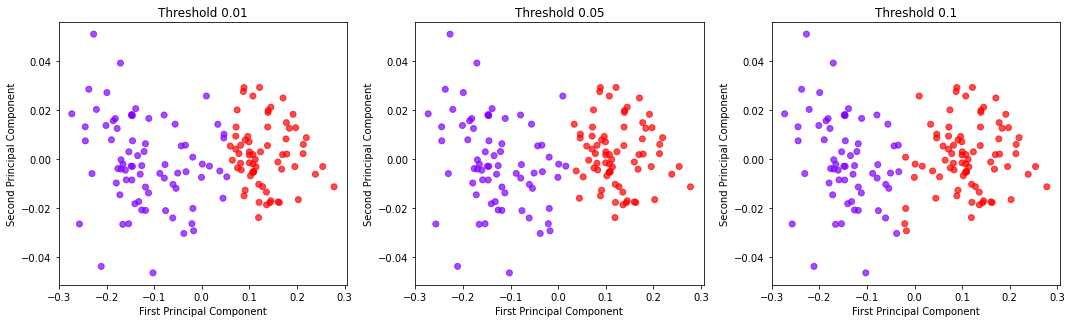

In [76]:
pca = PCA(n_components=2)
# pc_before = pca.fit_transform(df1[:, 3:])
pc_outliers = pca.fit_transform(data_split_modified_z_12[:, :2])

figure, axs = plt.subplots(nrows=1, ncols=3,figsize=(15,5))

axs[0].scatter(pc_outliers[:,0], pc_outliers[:,1], c=labels_001, cmap='rainbow', alpha=0.7)    
# axs[0,1].axvline(x=143, color='r')
axs[0].set_xlabel('First Principal Component')
axs[0].set_ylabel('Second Principal Component')
axs[0].title.set_text("Threshold 0.01")

axs[1].scatter(pc_outliers[:,0], pc_outliers[:,1], c=labels_005, cmap='rainbow', alpha=0.7)    
# axs[0,1].axvline(x=143, color='r')
axs[1].set_xlabel('First Principal Component')
axs[1].set_ylabel('Second Principal Component')
axs[1].title.set_text("Threshold 0.05")

axs[2].scatter(pc_outliers[:,0], pc_outliers[:,1], c=labels_01, cmap='rainbow', alpha=0.7)    
# axs[0,1].axvline(x=143, color='r')
axs[2].set_xlabel('First Principal Component')
axs[2].set_ylabel('Second Principal Component')
axs[2].title.set_text("Threshold 0.1")

figure.tight_layout(rect=[0, 0.03, 1, 0.95])


In [69]:
pc_outliers.shape

(141, 2)

# test of threshold after accident without the removal of the outliers

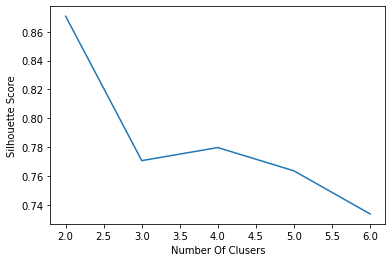

The highest silhouette scores(0.8707555796039116) is for 2 clusers


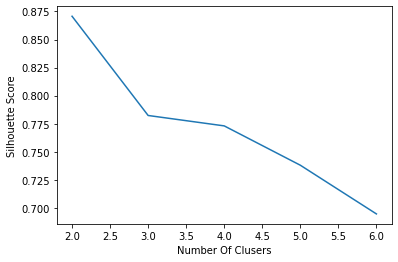

The highest silhouette scores(0.8707555796039116) is for 2 clusers


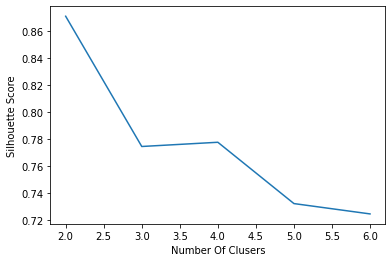

The highest silhouette scores(0.8707555796039116) is for 2 clusers


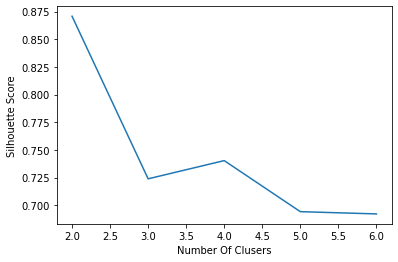

The highest silhouette scores(0.8707555796039116) is for 2 clusers


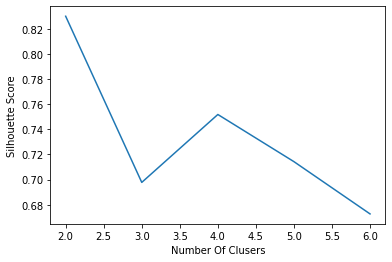

The highest silhouette scores(0.8299365678335128) is for 2 clusers


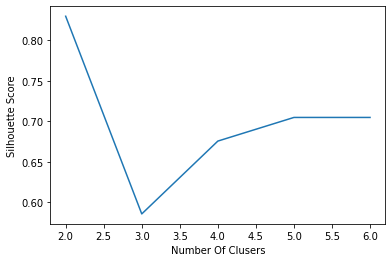

The highest silhouette scores(0.8299365678335128) is for 2 clusers


In [44]:
model_02_whole = Birch(n_clusters=None, threshold=0.2)

for i in traindf_list:
    model_02_whole.partial_fit(i)

# model.partial_fit(test_normal)

n = plot_silhouette_scores(model_02_whole, traindf, 2, 6)

model_02_whole.set_params(n_clusters = n)
model_02_whole.partial_fit()
    
labels_02_whole = model_02_whole.predict(data_to_plot[:, 3:])
##########################################################
model_01_whole = Birch(n_clusters=None, threshold=0.1)

for i in traindf_list:
    model_01_whole.partial_fit(i)

# model.partial_fit(test_normal)

n = plot_silhouette_scores(model_01_whole, traindf, 2, 6)

model_01_whole.set_params(n_clusters = n)
model_01_whole.partial_fit()
    
labels_01_whole = model_01_whole.predict(data_to_plot[:, 3:])
##########################################################
model_03_whole = Birch(n_clusters=None, threshold=0.3)

for i in traindf_list:
    model_03_whole.partial_fit(i)

# model.partial_fit(test_normal)

n = plot_silhouette_scores(model_03_whole, traindf, 2, 6)

model_03_whole.set_params(n_clusters = n)
model_03_whole.partial_fit()
    
labels_03_whole = model_03_whole.predict(data_to_plot[:, 3:])

##########################################################
model_005_whole = Birch(n_clusters=None, threshold=0.05)

for i in traindf_list:
    model_005_whole.partial_fit(i)

# model.partial_fit(test_normal)

n = plot_silhouette_scores(model_005_whole, traindf, 2, 6)

model_005_whole.set_params(n_clusters = n)
model_005_whole.partial_fit()
    
labels_005_whole = model_005_whole.predict(data_to_plot[:, 3:])

##############################################################
model_001_whole  = Birch(n_clusters=None, threshold=0.01)

for i in traindf_list:
    model_001_whole.partial_fit(i
                               )

# model.partial_fit(test_normal)

n = plot_silhouette_scores(model_001_whole, data_to_plot[:, 3:], 2, 6)

model_001_whole.set_params(n_clusters = n)
model_001_whole.partial_fit()
    
labels_001_whole = model_001_whole.predict(data_to_plot[:, 3:])

##############################################################
model_whole = Birch(n_clusters=None, threshold=0.5)

for i in traindf_list:
    model_whole.partial_fit(i)

# model.partial_fit(test_normal)

n = plot_silhouette_scores(model_whole, data_to_plot[:, 3:], 2, 6)

model_whole.set_params(n_clusters = n)
model_whole.partial_fit()
    
labels_whole = model_whole.predict(data_to_plot[:, 3:])

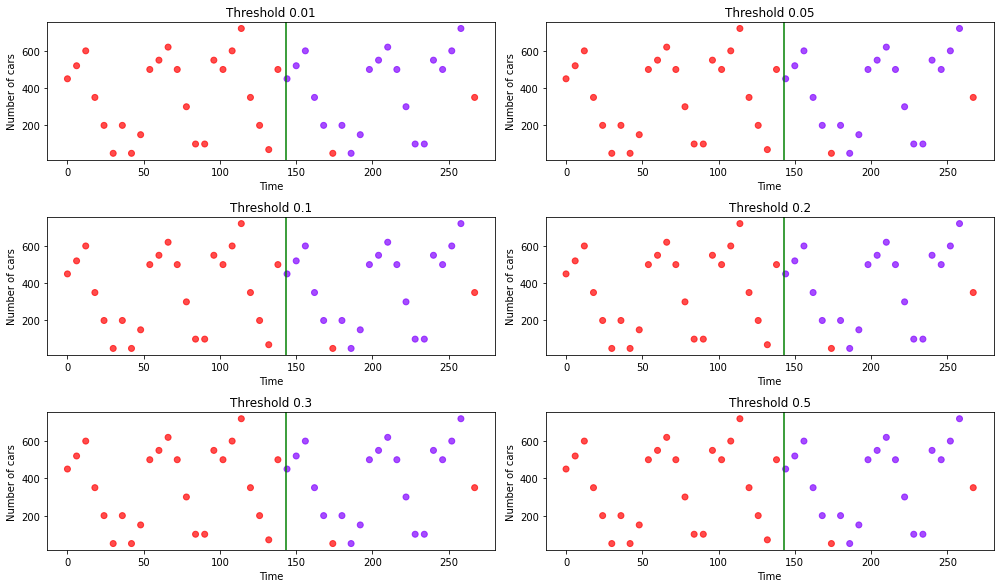

In [77]:
figure, axs = plt.subplots(nrows=3, ncols=2,figsize=(14,9))

axs[0,0].scatter(data_to_plot[:,0], data_to_plot[:,1], c=labels_001_whole, cmap='rainbow', alpha=0.7)
axs[0,0].axvline(x=143, color='g')
axs[0,0].set_ylabel('Number of cars')
axs[0,0].set_xlabel('Time')
axs[0,0].title.set_text("Threshold 0.01")

axs[0,1].scatter(data_to_plot[:,0], data_to_plot[:,1], c=labels_005_whole, cmap='rainbow', alpha=0.7)
axs[0,1].axvline(x=143, color='g')
axs[0,1].set_ylabel('Number of cars')
axs[0,1].set_xlabel('Time')
axs[0,1].title.set_text("Threshold 0.05")

axs[1,0].scatter(data_to_plot[:,0], data_to_plot[:,1], c=labels_01_whole, cmap='rainbow', alpha=0.7)    
axs[1,0].axvline(x=143, color='g')
axs[1,0].set_ylabel('Number of cars')
axs[1,0].set_xlabel('Time')
axs[1,0].title.set_text("Threshold 0.1")

axs[1,1].scatter(data_to_plot[:,0], data_to_plot[:,1], c=labels_02_whole, cmap='rainbow', alpha=0.7)   
axs[1,1].axvline(x=143, color='g')
axs[1,1].set_ylabel('Number of cars')
axs[1,1].set_xlabel('Time')
axs[1,1].title.set_text("Threshold 0.2")

axs[2,0].scatter(data_to_plot[:,0], data_to_plot[:,1], c=labels_03_whole, cmap='rainbow', alpha=0.7)
axs[2,0].axvline(x=143, color='g')
axs[2,0].set_ylabel('Number of cars')
axs[2,0].set_xlabel('Time')
axs[2,0].title.set_text("Threshold 0.3")

axs[2,1].scatter(data_to_plot[:,0], data_to_plot[:,1], c=labels_whole, cmap='rainbow', alpha=0.7)
axs[2,1].axvline(x=143, color='g')
axs[2,1].set_ylabel('Number of cars')
axs[2,1].set_xlabel('Time')
axs[2,1].title.set_text("Threshold 0.5")

figure.tight_layout(rect=[0, 0.03, 1, 0.95])


# figure.suptitle('Test of different Thresholds of BIRCH model', fontsize=20)

In [88]:
df1 = df.to_numpy()
labels_001_whole = model_001_whole.predict(df1[:, 3:])
labels_005_whole = model_005_whole.predict(df1[:, 3:])
labels_01_whole = model_01_whole.predict(df1[:, 3:])
labels_02_whole = model_02_whole.predict(df1[:, 3:])

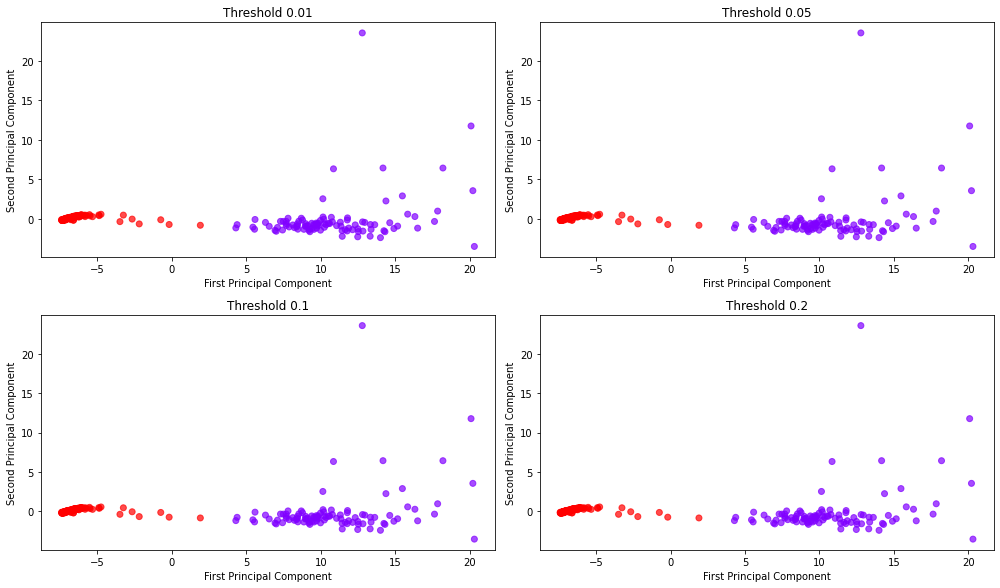

In [89]:
pca = PCA(n_components=2)
# pc_before = pca.fit_transform(df1[:, 3:])
pc_whole = pca.fit_transform(df1[:, 3:])
pc_whole[:, 1]


figure, axs = plt.subplots(nrows=2, ncols=2,figsize=(14,9))
axs[0,0].scatter(pc_whole[:, 0],pc_whole[:, 1], c=labels_001_whole, cmap='rainbow', alpha=0.7)
# axs[0,0].axvline(x=143, color='g')
axs[0,0].set_ylabel('Second Principal Component')
axs[0,0].set_xlabel('First Principal Component')
axs[0,0].title.set_text("Threshold 0.01")

axs[0,1].scatter(pc_whole[:, 0], pc_whole[:, 1], c=labels_005_whole, cmap='rainbow', alpha=0.7)
# axs[0,1].axvline(x=143, color='g')
axs[0,1].set_ylabel('Second Principal Component')
axs[0,1].set_xlabel('First Principal Component')
axs[0,1].title.set_text("Threshold 0.05")

axs[1,0].scatter(pc_whole[:, 0], pc_whole[:, 1], c=labels_01_whole, cmap='rainbow', alpha=0.7)    
# axs[1,0].axvline(x=143, color='g')
axs[1,0].set_ylabel('Second Principal Component')
axs[1,0].set_xlabel('First Principal Component')
axs[1,0].title.set_text("Threshold 0.1")

axs[1,1].scatter(pc_whole[:, 0], pc_whole[:, 1], c=labels_02_whole, cmap='rainbow', alpha=0.7)   
# axs[1,1].axvline(x=143, color='g')
axs[1,1].set_ylabel('Second Principal Component')
axs[1,1].set_xlabel('First Principal Component')
axs[1,1].title.set_text("Threshold 0.2")

figure.tight_layout(rect=[0, 0.03, 1, 0.95])



# WHOLE DATA AFTER OUTLIER REMOVAL

In [90]:
data_split_modified_z = df[['median_overhead', 'q1_overhead', 'q3_overhead', 'p9_overhead', 'totalCarNumber', 'index']].copy()
# data_split_modified_z = data_split_modified_z.iloc[:144, :]
data_split_modified_z = data_split_modified_z.to_numpy()

""" SIZE 12 """
data_split_modified_z_12 = np.split(data_split_modified_z, 3)
indexes = [] 

for d in range(len(data_split_modified_z_12)):
    ind = []
    k = len(data_split_modified_z_12[d])
    for i in [0, 1, 2, 3]:
        ys = data_split_modified_z_12[d][:,i] 
        median_y = np.median(ys)
        median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in ys])
#         print(median_absolute_deviation_y)
        for y in range(len(data_split_modified_z_12[d])):
            modified_z_score = 0.6745 * (data_split_modified_z_12[d][y, i] - median_y) / median_absolute_deviation_y
#             z_score = (data_split[d][y, i]  - mean_ys) / std_ys
            if np.abs(modified_z_score) > 3.5:
                ind.append(y)


    data_split_modified_z_12[d] = np.delete(data_split_modified_z_12[d], ind, axis=0)
#     print('Outliers detected: ' + str((k - len(data_split_modified_z_12[d]))))

data_split_modified_z_12 = np.concatenate(data_split_modified_z_12, axis=0)

couldnt get the scores, plz help
returning number of clusters = 2
couldnt get the scores, plz help
returning number of clusters = 2
couldnt get the scores, plz help
returning number of clusters = 2


/home/marta/env/lib/python3.6/site-packages/scikit_learn-0.22.2.post1-py3.6-linux-x86_64.egg/sklearn/cluster/_birch.py:638: ConvergenceWarning: Number of subclusters found (1) by Birch is less than (2). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/marta/env/lib/python3.6/site-packages/scikit_learn-0.22.2.post1-py3.6-linux-x86_64.egg/sklearn/cluster/_birch.py:638: ConvergenceWarning: Number of subclusters found (1) by Birch is less than (2). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/marta/env/lib/python3.6/site-packages/scikit_learn-0.22.2.post1-py3.6-linux-x86_64.egg/sklearn/cluster/_birch.py:638: ConvergenceWarning: Number of subclusters found (5) by Birch is less than (6). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


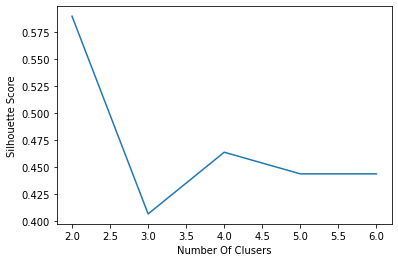

The highest silhouette scores(0.5895569696553205) is for 2 clusers


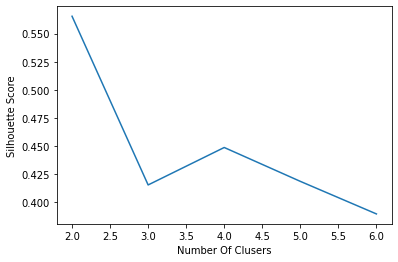

The highest silhouette scores(0.5654849942848789) is for 2 clusers
couldnt get the scores, plz help
returning number of clusters = 2


/home/marta/env/lib/python3.6/site-packages/scikit_learn-0.22.2.post1-py3.6-linux-x86_64.egg/sklearn/cluster/_birch.py:638: ConvergenceWarning: Number of subclusters found (1) by Birch is less than (2). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


In [91]:
model_02 = Birch(n_clusters=None, threshold=0.2)

for i in data_split_modified_z_12_list:
    model_02.partial_fit(i[:, :2])

# model.partial_fit(test_normal)

n = plot_silhouette_scores(model_02, data_split_modified_z_12[:, :2], 2, 6)

model_02.set_params(n_clusters = n)
model_02.partial_fit()
    
labels_02 = model_02.predict(data_split_modified_z_12[:, :2])
##########################################################
model_01= Birch(n_clusters=None, threshold=0.1)

for i in data_split_modified_z_12_list:
    model_01.partial_fit(i[:, :2])

# model.partial_fit(test_normal)

n = plot_silhouette_scores(model_01, data_split_modified_z_12[:, :2], 2, 6)

model_01.set_params(n_clusters = n)
model_01.partial_fit()
    
labels_01 = model_01.predict(data_split_modified_z_12[:, :2])
##########################################################
model_03 = Birch(n_clusters=None, threshold=0.3)

for i in data_split_modified_z_12_list:
    model_03.partial_fit(i[:, :2])

# model.partial_fit(test_normal)

n = plot_silhouette_scores(model_03, data_split_modified_z_12[:, :2], 2, 6)

model_03.set_params(n_clusters = n)
model_03.partial_fit()
    
labels_03 = model_03.predict(data_split_modified_z_12[:, :2])

##########################################################
model_005 = Birch(n_clusters=None, threshold=0.05)

for i in data_split_modified_z_12_list:
    model_005.partial_fit(i[:, :2])

# model.partial_fit(test_normal)

n = plot_silhouette_scores(model_005, data_split_modified_z_12[:, :2], 2, 6)

model_005.set_params(n_clusters = n)
model_005.partial_fit()
    
labels_005 = model_005.predict(data_split_modified_z_12[:, :2])

##############################################################
model_001 = Birch(n_clusters=None, threshold=0.01)

for i in data_split_modified_z_12_list:
    model_001.partial_fit(i[:, :2])

# model.partial_fit(test_normal)

n = plot_silhouette_scores(model_001, data_split_modified_z_12[:, :2], 2, 6)

model_001.set_params(n_clusters = n)
model_001.partial_fit()
    
labels_001 = model_001.predict(data_split_modified_z_12[:, :2])

##############################################################
model = Birch(n_clusters=None, threshold=0.5)

for i in data_split_modified_z_12_list:
    model.partial_fit(i[:, :2])

# model.partial_fit(test_normal)

n = plot_silhouette_scores(model, data_split_modified_z_12[:, :2], 2, 6)

model.set_params(n_clusters = n)
model.partial_fit()
    
labels = model.predict(data_split_modified_z_12[:, :2])

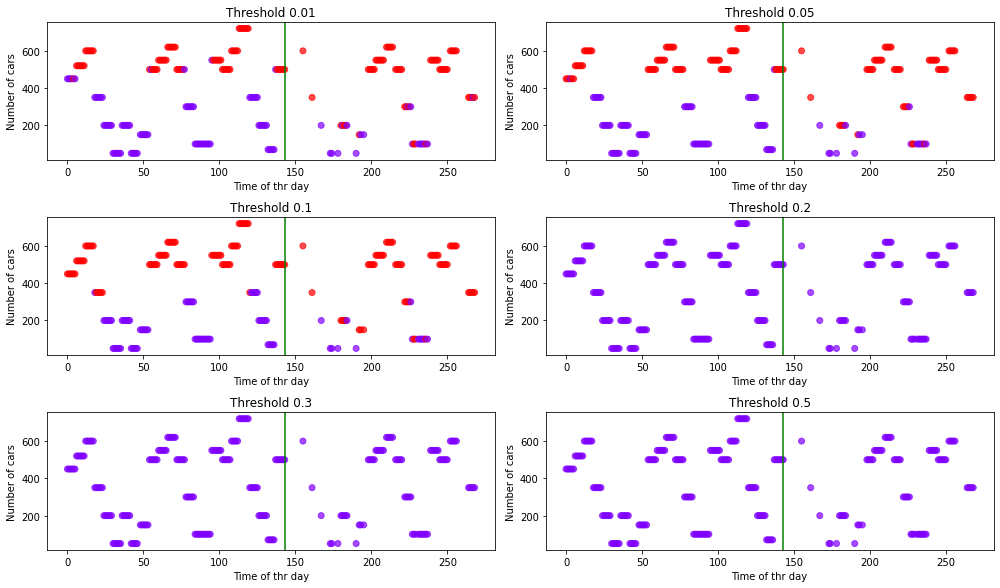

In [92]:
figure, axs = plt.subplots(nrows=3, ncols=2,figsize=(14,9))

axs[0,0].scatter(data_split_modified_z_12[:,5], data_split_modified_z_12[:,4], c=labels_001, cmap='rainbow', alpha=0.7)
axs[0,0].axvline(x=143, color='g')
axs[0,0].set_ylabel('Number of cars')
axs[0,0].set_xlabel('Time of thr day')
axs[0,0].title.set_text("Threshold 0.01")

axs[0,1].scatter(data_split_modified_z_12[:,5], data_split_modified_z_12[:,4], c=labels_005, cmap='rainbow', alpha=0.7)
axs[0,1].axvline(x=143, color='g')
axs[0,1].set_ylabel('Number of cars')
axs[0,1].set_xlabel('Time of thr day')
axs[0,1].title.set_text("Threshold 0.05")

axs[1,0].scatter(data_split_modified_z_12[:,5], data_split_modified_z_12[:,4], c=labels_01, cmap='rainbow', alpha=0.7)    
axs[1,0].axvline(x=143, color='g')
axs[1,0].set_ylabel('Number of cars')
axs[1,0].set_xlabel('Time of thr day')
axs[1,0].title.set_text("Threshold 0.1")

axs[1,1].scatter(data_split_modified_z_12[:,5], data_split_modified_z_12[:,4], c=labels_02, cmap='rainbow', alpha=0.7)   
axs[1,1].axvline(x=143, color='g')
axs[1,1].set_ylabel('Number of cars')
axs[1,1].set_xlabel('Time of thr day')
axs[1,1].title.set_text("Threshold 0.2")

axs[2,0].scatter(data_split_modified_z_12[:,5], data_split_modified_z_12[:,4], c=labels_03, cmap='rainbow', alpha=0.7)
axs[2,0].axvline(x=143, color='g')
axs[2,0].set_ylabel('Number of cars')
axs[2,0].set_xlabel('Time of thr day')
axs[2,0].title.set_text("Threshold 0.3")

axs[2,1].scatter(data_split_modified_z_12[:,5], data_split_modified_z_12[:,4], c=labels, cmap='rainbow', alpha=0.7)
axs[2,1].axvline(x=143, color='g')
axs[2,1].set_ylabel('Number of cars')
axs[2,1].set_xlabel('Time of thr day')
axs[2,1].title.set_text("Threshold 0.5")

figure.tight_layout(rect=[0, 0.03, 1, 0.95])
# figure.suptitle('Test of different Thresholds for BIRCH model', fontsize=20)